In [24]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [25]:
#Import data sets
happy16=pd.DataFrame(pd.read_csv('CSVs/Happiness_2016.csv'))
happy15=pd.DataFrame(pd.read_csv('CSVs/Happiness_2015.csv'))
obese=pd.DataFrame(pd.read_csv('CSVs/obese_adults.csv'))

obese.head()

,Unnamed: 0,2016,2015
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years
2,Country,Both sexes,Both sexes
3,Afghanistan,4.5 [2.8-6.7],4.3 [2.6-6.4]
4,Albania,22.3 [17.4-27.4],21.7 [17.0-26.6]


In [26]:
#Drop top three rows of obesity data, rename columns
obese=obese.drop([0,1,2])
obese=obese.rename(columns={'Unnamed: 0':'Country'})
obese.dtypes

Country    object
2016       object
2015       object
dtype: object

In [27]:
#Separate percent from range of estimate for 2016
ob_split16 = obese['2016'].str.split(' ', n=1, expand=True)
obese['2016 Percent']=ob_split16[0]
obese.head()

,Country,2016,2015,2016 Percent
3,Afghanistan,4.5 [2.8-6.7],4.3 [2.6-6.4],4.5
4,Albania,22.3 [17.4-27.4],21.7 [17.0-26.6],22.3
5,Algeria,26.6 [21.7-32.0],25.7 [21.0-30.8],26.6
6,Andorra,28.0 [22.0-34.0],27.7 [21.8-33.5],28.0
7,Angola,6.8 [4.2-10.3],6.5 [4.0-9.8],6.8


In [28]:
#Separate percent from range of estimate for 2015
ob_split15 = obese['2015'].str.split(' ', n=1, expand=True)
obese['2015 Percent']=ob_split15[0]
obese.head()

,Country,2016,2015,2016 Percent,2015 Percent
3,Afghanistan,4.5 [2.8-6.7],4.3 [2.6-6.4],4.5,4.3
4,Albania,22.3 [17.4-27.4],21.7 [17.0-26.6],22.3,21.7
5,Algeria,26.6 [21.7-32.0],25.7 [21.0-30.8],26.6,25.7
6,Andorra,28.0 [22.0-34.0],27.7 [21.8-33.5],28.0,27.7
7,Angola,6.8 [4.2-10.3],6.5 [4.0-9.8],6.8,6.5


In [29]:
#Narrow columns and fill blanks
obese=obese[['Country','2016 Percent','2015 Percent']]
obese=obese.replace(r'^\s*$', np.nan, regex=True)
obese=obese.dropna(how='any')
obese.head()

,Country,2016 Percent,2015 Percent
3,Afghanistan,4.5,4.3
4,Albania,22.3,21.7
5,Algeria,26.6,25.7
6,Andorra,28.0,27.7
7,Angola,6.8,6.5


In [30]:
#Make a column that has the average obesity rate across 2016 and 2015
obese['2016 Percent'] = pd.to_numeric(obese['2016 Percent'], errors='coerce')
obese['2015 Percent'] = pd.to_numeric(obese['2015 Percent'], errors='coerce')
obese['Mean Percent Obesity (2015 & 2016)']=((obese['2016 Percent'] + obese['2015 Percent'])/2)

obese.head()

,Country,2016 Percent,2015 Percent,Mean Percent Obesity (2015 & 2016)
3,Afghanistan,4.5,4.3,4.40
4,Albania,22.3,21.7,22.00
5,Algeria,26.6,25.7,26.15
6,Andorra,28.0,27.7,27.85
7,Angola,6.8,6.5,6.65


In [31]:
#Merge 2016 and 2015 happiness data
happy = pd.merge(happy16, happy15, on = 'Country', how = 'inner')
happy = happy[['Country', 'Happiness Score_x', 'Happiness Score_y']]
happy.head()

,Country,Happiness Score_x,Happiness Score_y
0,Denmark,7.526,7.527
1,Switzerland,7.509,7.587
2,Iceland,7.501,7.561
3,Norway,7.498,7.522
4,Finland,7.413,7.406


In [32]:
#Calculate average happiness score across 2016 and 2015, merge with obesity data
happy['Average Happiness (2015 & 2016)'] = ((happy['Happiness Score_x'] + happy['Happiness Score_y'])/2)
happy_obese = pd.merge(happy, obese, on='Country', how='inner')
happy_obese=happy_obese.replace(r'^\s*$', np.nan, regex=True)
happy_obese=happy_obese.dropna(how='any')
happy_obese.head()

,Country,Happiness Score_x,Happiness Score_y,Average Happiness (2015 & 2016),2016 Percent,2015 Percent,Mean Percent Obesity (2015 & 2016)
0,Denmark,7.526,7.527,7.5265,21.3,20.9,21.10
1,Switzerland,7.509,7.587,7.5480,21.2,20.8,21.00
2,Iceland,7.501,7.561,7.5310,23.1,22.7,22.90
3,Norway,7.498,7.522,7.5100,25.0,24.5,24.75
4,Finland,7.413,7.406,7.4095,24.9,24.5,24.70


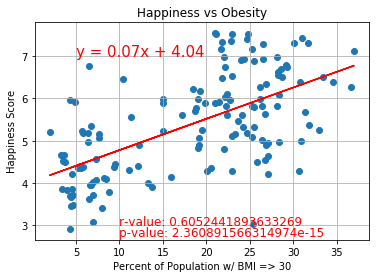

R-value: 0.6052441893633269, P-value: 2.360891566314974e-15


In [33]:
#Linear Regression!
y_values=happy_obese['Average Happiness (2015 & 2016)']
x_values=happy_obese['Mean Percent Obesity (2015 & 2016)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Obesity')
plt.xlabel('Percent of Population w/ BMI => 30')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(5,7),fontsize=15,color="red")
plt.annotate(r_value,(10,3),fontsize=12,color="red")
plt.annotate(p_value,(10,2.75),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/obesity.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [34]:
#Moderate positive correlation
len(happy_obese)

140

In [35]:
#Import data set with ISO country codes, merge with happiness and obesity data
iso=pd.read_csv('csvs/country_iso.csv')
iso=iso.drop(['Unnamed: 0'], axis=1)
iso=iso.rename(columns={'iso_a3':'Code'})
iso2=pd.merge(happy_obese, iso, on='Country', how='inner')
iso2=iso2[['Code', 'Average Happiness (2015 & 2016)','Mean Percent Obesity (2015 & 2016)']]
iso2.head()

,Code,Average Happiness (2015 & 2016),Mean Percent Obesity (2015 & 2016)
0,DNK,7.5265,21.10
1,CHE,7.5480,21.00
2,ISL,7.5310,22.90
3,NOR,7.5100,24.75
4,FIN,7.4095,24.70


In [36]:
#import dataset with geographic info to plot chorograph
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'iso_a3':'Code'}) 
world = pd.merge(world, iso2, on='Code', how='inner')
world.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,Average Happiness (2015 & 2016),Mean Percent Obesity (2015 & 2016)
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",3.7235,6.95
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.4155,31.00
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",7.1115,37.00
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",5.8870,20.95
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",5.9950,15.00


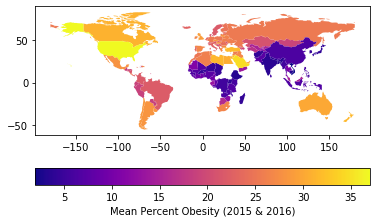

In [37]:
#Chorograph of obesity rate
fig, ax = plt.subplots(1,1)
world.plot(column='Mean Percent Obesity (2015 & 2016)', ax=ax, legend=True, cmap='plasma',
           legend_kwds={'label': "Mean Percent Obesity (2015 & 2016)",'orientation': "horizontal"})
plt.savefig('Images/obesity_map 2017.png')